#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [6]:
df.iloc[0]

,0
customerID,0002-ORFBO
Churn,No
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."


In [7]:
df = pd.json_normalize(df.to_dict(orient= 'records'))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [9]:
df.columns.tolist()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [10]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [11]:
colunas_relevantes = [
    'customerID',
    'Churn',
    'customer.SeniorCitizen',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

In [12]:
df_relevantes = df[colunas_relevantes].copy()
df_relevantes.head()

,customerID,Churn,customer.SeniorCitizen,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,0,65.6,593.3
1,0003-MKNFE,No,0,59.9,542.4
2,0004-TLHLJ,Yes,0,73.9,280.85
3,0011-IGKFF,Yes,1,98.0,1237.85
4,0013-EXCHZ,Yes,1,83.9,267.4


In [13]:
df_relevantes.isnull().sum()

,0
customerID,0
Churn,0
customer.SeniorCitizen,0
account.Charges.Monthly,0
account.Charges.Total,0


In [14]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
def verificar_unique(df):
  for coluna in df.columns:
    try:
        unicos = pd.unique(df[coluna])
        print(f"Coluna: {coluna}")
        print(f"Valores únicos: {unicos}\n")
    except Exception as e:
        print(f"Erro na coluna {coluna}: {e}")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [18]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors= 'coerce')

In [19]:
df['account.Charges.Total'].dtype

dtype('float64')

In [20]:
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(bool)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [22]:
df['Churn'] = df['Churn'].replace('', np.nan)

In [23]:
df['Churn'].isnull().sum()

np.int64(224)

In [24]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [25]:
df['Churn'].unique()

array([ 0.,  1., nan])

In [26]:
verificar_unique(df)

Coluna: customerID
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
Valores únicos: [ 0.  1. nan]

Coluna: customer.gender
Valores únicos: ['Female' 'Male']

Coluna: customer.SeniorCitizen
Valores únicos: [False  True]

Coluna: customer.Partner
Valores únicos: ['Yes' 'No']

Coluna: customer.Dependents
Valores únicos: ['Yes' 'No']

Coluna: customer.tenure
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone.PhoneService
Valores únicos: ['Yes' 'No']

Coluna: phone.MultipleLines
Valores únicos: ['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
Valores únicos: ['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
Valores únicos: ['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup
Valores ún

In [27]:
df['contas_diarias'] = (df['account.Charges.Monthly']/30).round(2)

In [28]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas_diarias
0,0002-ORFBO,0.0,Female,False,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,False,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [29]:
df.set_index('customerID', inplace= True)

In [30]:
df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evadiu',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'tem_parceiro',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'meses_com_empresa',
    'phone.PhoneService': 'tem_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'valor_total'
}, inplace=True)

In [31]:
df.head()

,evadiu,genero,idoso,tem_parceiro,tem_dependentes,meses_com_empresa,tem_telefone,multiplas_linhas,tipo_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.0,Female,False,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
0003-MKNFE,0.0,Male,False,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
0004-TLHLJ,1.0,Male,False,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
0011-IGKFF,1.0,Male,True,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
0013-EXCHZ,1.0,Female,True,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [32]:
df_evadiu = df[df['evadiu'] == 1]


In [33]:
df_genero = df_evadiu['genero'].map({'Male': 1, 'Female': 0})
df_genero.value_counts()

,count
genero,
0,939
1,930


In [34]:
df_evadiu['metodo_pagamento'].sort_values()

,metodo_pagamento
customerID,
4818-DRBQT,Bank transfer (automatic)
8111-RKSPX,Bank transfer (automatic)
4322-RCYMT,Bank transfer (automatic)
8166-ZZTFS,Bank transfer (automatic)
8168-UQWWF,Bank transfer (automatic)
...,...
3668-QPYBK,Mailed check
3669-LVWZB,Mailed check
1571-SAVHK,Mailed check


In [67]:
df['genero'].value_counts()

,count
genero,
Male,3675
Female,3592


#📊 Carga e análise

In [35]:
df.describe()

,evadiu,meses_com_empresa,valor_mensal,valor_total,contas_diarias
count,7043.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,32.346498,64.720098,2280.634213,2.157292
std,0.441561,24.571773,30.129572,2268.632997,1.004407
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.425000,400.225000,1.180000
50%,0.000000,29.000000,70.300000,1391.000000,2.340000
75%,1.000000,55.000000,89.875000,3785.300000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [36]:
sns.set_theme(style= 'dark')

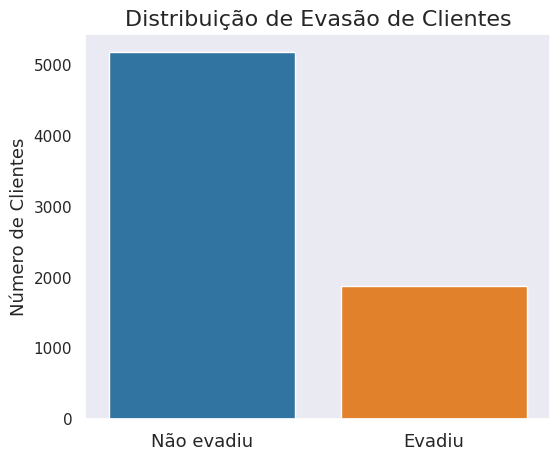

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.countplot(data=df, x='evadiu', hue='evadiu', palette='tab10', legend=False)
ax.set_title('Distribuição de Evasão de Clientes', fontsize= 16)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não evadiu', 'Evadiu'], fontsize= 13)
ax.set_xlabel('')
ax.set_ylabel('Número de Clientes', fontsize= 13)

plt.show()

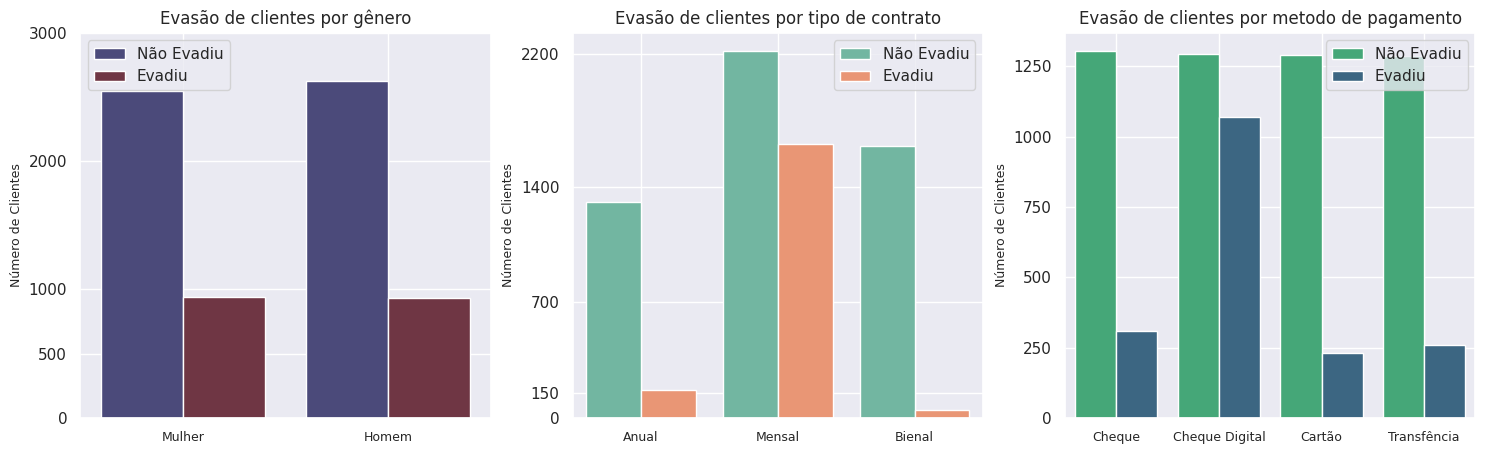

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(data=df, x='genero', hue='evadiu', palette='icefire', ax=axs[0])
axs[0].set_title('Evasão de clientes por gênero', fontsize=12)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Mulher', 'Homem'], fontsize=9)
axs[0].set_xlabel('')
axs[0].set_yticks([0, 500, 1000, 2000, 3000])
axs[0].set_ylabel('Número de Clientes', fontsize=9)
axs[0].grid(True)
axs[0].legend(labels= ('Não Evadiu', 'Evadiu'))



##2º Gráfico - Tipo de Contrato
sns.countplot(data=df, x='tipo_contrato', hue='evadiu', palette='Set2', legend=False, ax=axs[1])
axs[1].set_title('Evasão de clientes por tipo de contrato', fontsize= 12)
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(['Anual', 'Mensal', 'Bienal'], fontsize= 9)
axs[1].set_xlabel('')
axs[1].set_yticks([0, 150, 700, 1400, 2200])
axs[1].set_ylabel('Número de Clientes', fontsize= 9)
axs[1].grid(True)
axs[1].legend(labels= ('Não Evadiu', 'Evadiu'))

##3º Gráfico - Metódo de Pagamento
sns.countplot(data=df, x='metodo_pagamento', hue='evadiu', palette='viridis_r', legend=False, ax=axs[2])
axs[2].set_title('Evasão de clientes por metodo de pagamento', fontsize= 12)
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(['Cheque', 'Cheque Digital', 'Cartão' , 'Transfência'], fontsize= 9)
axs[2].set_xlabel('')
axs[2].set_yticks([0, 250, 500, 750, 1000, 1250])
axs[2].set_ylabel('Número de Clientes', fontsize= 9)
axs[2].grid(True)
axs[2].legend(labels= ('Não Evadiu', 'Evadiu'))


plt.show()



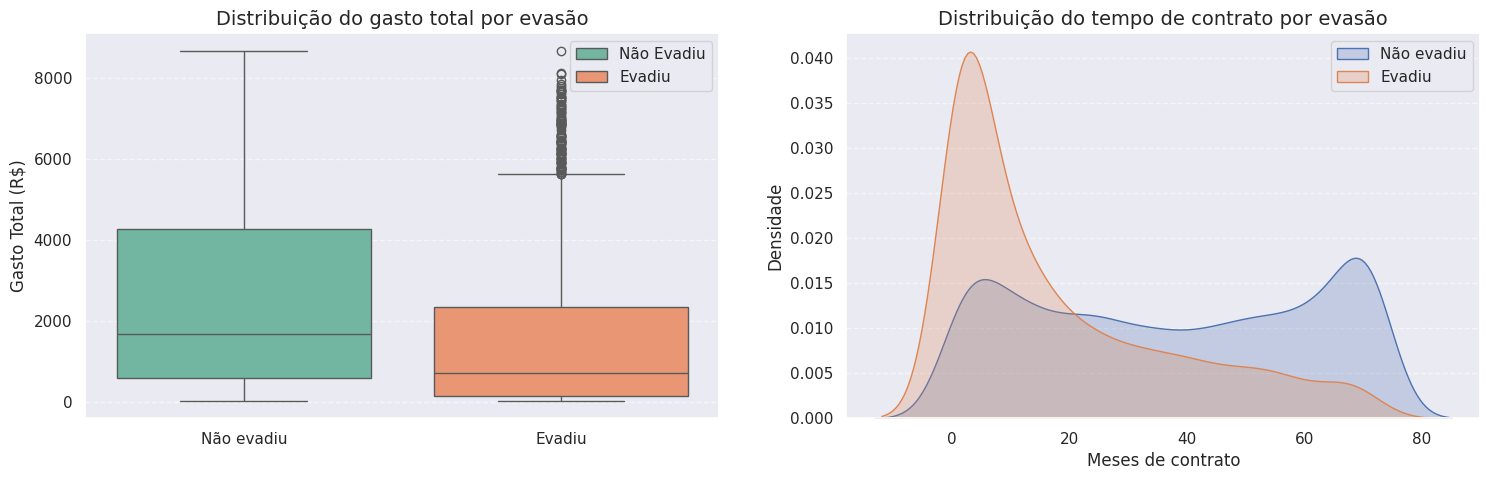

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(18,5))

##1º Gráfico - Gênero
sns.boxplot(data=df, x='evadiu', y='valor_total', hue='evadiu', palette='Set2', ax=axs[0])
axs[0].set_xticks([0, 1], ['Não evadiu', 'Evadiu'])
axs[0].set_title('Distribuição do gasto total por evasão', fontsize=14)
axs[0].set_xlabel('')
axs[0].set_ylabel('Gasto Total (R$)', fontsize=12)
axs[0].grid(True, axis='y', linestyle='--', alpha=0.6)
axs[0].legend(labels= ('Não Evadiu', 'Evadiu'))


##2º Gráfico - Tipo de Contrato
sns.kdeplot(data=df[df['evadiu'] == 0], x='meses_com_empresa', label='Não evadiu', fill=True, ax=axs[1])
sns.kdeplot(data=df[df['evadiu'] == 1], x='meses_com_empresa', label='Evadiu', fill=True, ax=axs[1])
axs[1].set_title('Distribuição do tempo de contrato por evasão', fontsize=14)
axs[1].set_xlabel('Meses de contrato', fontsize=12)
axs[1].set_ylabel('Densidade', fontsize=12)
axs[1].legend()
axs[1].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.show()

#📄Relatorio Final

#Introdução
O objetivo deste projeto é analisar os dados de clientes de uma empresa de telecomunicações com foco em entender o fenômeno da evasão de clientes, também chamado de churn.
Essa análise é essencial para identificar padrões de comportamento que levam clientes a cancelar seus serviços e, a partir disso, propor estratégias para retenção.

A evasão representa perdas financeiras e indica possíveis falhas no atendimento, nos planos oferecidos ou na experiência do usuário.

#Limpeza e Tratamento de Dados
Para tornar os dados adequados à análise, foram realizados os seguintes passos:

-Importação dos dados JSON via API.

-Renomeação de colunas para nomes mais legíveis e em português.

-Conversão de tipos de dados, como transformar colunas de valores em float ou int, quando necessário.

-Tratamento de valores ausentes (NaN) com pd.to_numeric(..., errors='coerce') e eliminação ou imputação quando necessário.

-Mapeamento de variáveis categóricas como evasão (Evadiu = 1, Permaneceu = 0).

-Criação de colunas auxiliares, como tempo de contrato, tipo de pagamento, entre outras.

#Análise Exploratória de Dados (EDA)

Foi analisada a proporção de clientes que evadiram e os que permaneceram. Gráficos de barras mostraram a presença significativa de evasão em determinadas categorias.

1 - Evasão por variáveis categóricas

*Gênero

*Tipo de contrato

*Método de pagamento

2 - Evasão por variáveis numéricas

*Tempo de permanência (tenure)

*Total gasto

#Conclusões e Insights

Conclusões Gerais da Análise de Evasão de Clientes (Churn)

1 - Gênero:

*Apesar da quantidade de clientes homens ser ligeiramente superior, mulheres apresentaram uma taxa de evasão levemente maior.

*A diferença, no entanto, é quase imperceptível, indicando que o gênero não é um fator decisivo de evasão, mas ainda assim pode ser considerado em estratégias personalizadas.

2 - Tipo de Contrato:

*O tipo de contrato mensal é o mais popular entre os clientes.

*No entanto, também é o que apresenta maior taxa de evasão, tanto em números absolutos quanto percentuais.

*Contratos anuais e bienais possuem uma taxa de evasão muito menor, com o bienal sendo praticamente nulo em evasão.

3 - Método de Pagamento:

*A distribuição entre métodos de pagamento é relativamente equilibrada.

*No entanto, clientes que usam “cheque eletrônico (electronic check)” têm uma taxa de evasão bem superior aos demais métodos, como cartão de crédito e débito automático.

4 - Tempo de Contrato (Meses):

*Clientes com menos de 10 meses de contrato concentram a maior taxa de evasão.

*A taxa cai drasticamente a partir de 20 meses, e clientes com mais de 60 meses dificilmente evadem, indicando forte fidelização com o tempo.

5 - Gasto Total:

*Clientes que não evadiram tendem a gastar muito mais ao longo do tempo.

*A mediana do gasto entre os que permanecem é significativamente mais alta.

*Clientes que evadem geralmente gastam pouco antes de sair — possivelmente por evadirem logo no início do relacionamento com a empresa.

#Sugestões com Base nas Conclusões

1 - Fortalecer Programas de Retenção nos Primeiros Meses:

*Criar campanhas de onboarding mais eficazes para os primeiros 6 meses.

*Oferecer bônus ou benefícios progressivos nos primeiros meses para estimular permanência até o cliente alcançar o “ponto de fidelização”.

2 - Incentivar Contratos de Longo Prazo:

*Oferecer descontos, vantagens ou brindes para migração de contratos mensais para anuais ou bienais.

*Demonstrar claramente os benefícios financeiros e de estabilidade dos planos longos.

3 - Monitorar Clientes com Pagamento via Cheque Eletrônico:

*Aplicar ações específicas para clientes com esse método de pagamento, como:

*Migrar para débito automático ou cartão de crédito.

*Avaliar se esse método está associado a maior inadimplência ou menor engajamento.

4 - Segmentar Ofertas por Perfil de Gasto:

*Clientes que gastam mais tendem a ser mais fiéis — considere oferecer planos personalizados, exclusivos ou com recompensas para esse público.

*Para os de menor gasto, estudar se há barreiras de entrada, como complexidade de serviços ou custo-benefício percebido.